<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/xarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[ 0.2799358 ,  0.47911716, -1.87465995],
       [ 1.10369619, -0.97983053,  0.66280674]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [3]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))

<xarray.DataArray 'foo' (dim_0: 3)> Size: 24B
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 24B 'a' 'b' 'c'

In [4]:
# like in pandas, values is a numpy array that you can modify in-place
data.values
data.dims
data.coords
# you can use this dictionary to store arbitrary metadata
data.attrs

{}

In [5]:
# positional and by integer label, like numpy
data[0, :]

# loc or "location": positional and coordinate label, like pandas
data.loc[10]

# isel or "integer select":  by dimension name and integer label
data.isel(x=0)

# sel or "select": by dimension name and coordinate label
data.sel(x=10)

<xarray.DataArray (y: 3)> Size: 24B
array([ 0.2799358 ,  0.47911716, -1.87465995])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

In [6]:
data.attrs["long_name"] = "random velocity"
data.attrs["units"] = "metres/sec"
data.attrs["description"] = "A random variable created as an example."
data.attrs["random_attribute"] = 123
data.attrs
# you can add metadata to coordinates too
data.x.attrs["units"] = "x units"

In [7]:
data + 10
np.sin(data)
# transpose
data.T
data.sum()

<xarray.DataArray ()> Size: 8B
array(-0.3289346)

In [8]:
data.mean(dim="x")

<xarray.DataArray (y: 3)> Size: 24B
array([ 0.69181599, -0.25035669, -0.60592661])
Dimensions without coordinates: y

In [9]:
a = xr.DataArray(np.random.randn(3), [data.coords["y"]])
b = xr.DataArray(np.random.randn(4), dims="z")

a
b

a + b

<xarray.DataArray (y: 3, z: 4)> Size: 96B
array([[-0.22250853,  0.11326465,  1.08716727, -0.50215714],
       [ 0.11484884,  0.45062201,  1.42452463, -0.16479978],
       [-3.07768572, -2.74191254, -1.76800993, -3.35733433]])
Coordinates:
  * y        (y) int64 24B 0 1 2
Dimensions without coordinates: z

In [10]:
data - data.T

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[0., 0., 0.],
       [0., 0., 0.]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [14]:
labels = xr.DataArray(["E", "F", "E"], [data.coords["y"]], name="labels")
labels
data.groupby(labels).mean("y")
data.groupby(labels).map(lambda x: x - x.min())

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[2.15459575, 1.45894769, 0.        ],
       [2.97835615, 0.        , 2.53746669]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

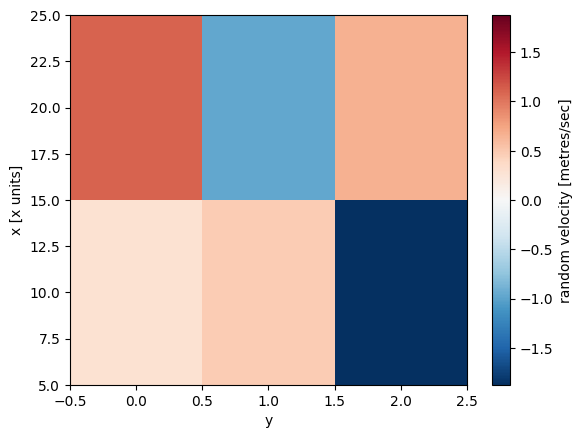

In [15]:
data.plot()

In [16]:
x = xr.DataArray(
    [[25, 35], [10, 24]],
    dims=("lat", "lon"),
    coords={"lat": [35.0, 40.0], "lon": [100.0, 120.0]},
)
y = xr.DataArray(
    [[20, 5], [7, 13]],
    dims=("lat", "lon"),
    coords={"lat": [35.0, 42.0], "lon": [100.0, 120.0]},
)
a, b = xr.align(x, y)

# By default, an "inner join" is performed
# so "a" is a copy of "x" where coordinates match "y"
a

<xarray.DataArray (lat: 1, lon: 2)> Size: 16B
array([[25, 35]])
Coordinates:
  * lat      (lat) float64 8B 35.0
  * lon      (lon) float64 16B 100.0 120.0

In [17]:
# 'a' has shape (3,) and 'b' has shape (4,)
a = xr.DataArray(np.array([1, 2, 3]), dims=["x"])
b = xr.DataArray(np.array([4, 5, 6, 7]), dims=["y"])

# 2D array with shape (3, 4)
a + b

<xarray.DataArray (x: 3, y: 4)> Size: 96B
array([[ 5,  6,  7,  8],
       [ 6,  7,  8,  9],
       [ 7,  8,  9, 10]])
Dimensions without coordinates: x, y

In [18]:
# create two 1D arrays with names
arr1 = xr.DataArray(
    [1, 2, 3], dims=["x"], coords={"x": [10, 20, 30]}, name="arr1"
)
arr2 = xr.DataArray(
    [4, 5, 6], dims=["x"], coords={"x": [20, 30, 40]}, name="arr2"
)

# merge the two arrays into a new dataset
merged_ds = xr.Dataset({"arr1": arr1, "arr2": arr2})
merged_ds

<xarray.Dataset> Size: 96B
Dimensions:  (x: 4)
Coordinates:
  * x        (x) int64 32B 10 20 30 40
Data variables:
    arr1     (x) float64 32B 1.0 2.0 3.0 nan
    arr2     (x) float64 32B nan 4.0 5.0 6.0

In [19]:
a = xr.DataArray([[1, 2], [3, 4]], dims=("x", "y"))
b = xr.DataArray([[5, 6], [7, 8]], dims=("x", "y"))
c = xr.concat([a, b], dim="c")
c

<xarray.DataArray (c: 2, x: 2, y: 2)> Size: 64B
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])
Dimensions without coordinates: c, x, y

In [20]:
ds1 = xr.Dataset(
    {"data": xr.DataArray([[1, 2], [3, 4]], dims=("x", "y"))},
    coords={"x": [1, 2], "y": [3, 4]},
)
ds2 = xr.Dataset(
    {"data": xr.DataArray([[5, 6], [7, 8]], dims=("x", "y"))},
    coords={"x": [2, 3], "y": [4, 5]},
)

# combine the datasets
combined_ds = xr.combine_by_coords([ds1, ds2])
combined_ds


<xarray.Dataset> Size: 152B
Dimensions:  (x: 3, y: 4)
Coordinates:
  * x        (x) int64 24B 1 2 3
  * y        (y) int64 32B 3 4 4 5
Data variables:
    data     (x, y) float64 96B 1.0 2.0 nan nan 3.0 4.0 5.0 6.0 nan nan 7.0 8.0

In [21]:
data = np.random.rand(4, 3)
locs = ["IA", "IL", "IN"]
times = pd.date_range("2000-01-01", periods=4)
foo = xr.DataArray(data, coords=[times, locs], dims=["time", "space"])
foo

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.0555414 , 0.67553298, 0.61742359],
       [0.0660793 , 0.78594999, 0.9187168 ],
       [0.83583069, 0.0285501 , 0.62951481],
       [0.97357501, 0.0994214 , 0.9620951 ]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'

In [22]:
xr.DataArray(data)

<xarray.DataArray (dim_0: 4, dim_1: 3)> Size: 96B
array([[0.0555414 , 0.67553298, 0.61742359],
       [0.0660793 , 0.78594999, 0.9187168 ],
       [0.83583069, 0.0285501 , 0.62951481],
       [0.97357501, 0.0994214 , 0.9620951 ]])
Dimensions without coordinates: dim_0, dim_1

In [23]:
xr.DataArray(data, coords=[("time", times), ("space", locs)])

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.0555414 , 0.67553298, 0.61742359],
       [0.0660793 , 0.78594999, 0.9187168 ],
       [0.83583069, 0.0285501 , 0.62951481],
       [0.97357501, 0.0994214 , 0.9620951 ]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'

In [24]:
xr.DataArray(
    data,
    coords={
        "time": times,
        "space": locs,
        "const": 42,
        "ranking": ("space", [1, 2, 3]),
    },
    dims=["time", "space"],
)

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.0555414 , 0.67553298, 0.61742359],
       [0.0660793 , 0.78594999, 0.9187168 ],
       [0.83583069, 0.0285501 , 0.62951481],
       [0.97357501, 0.0994214 , 0.9620951 ]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
    const    int64 8B 42
    ranking  (space) int64 24B 1 2 3

In [25]:
xr.DataArray(
    data,
    coords={
        "time": times,
        "space": locs,
        "const": 42,
        "ranking": (("time", "space"), np.arange(12).reshape(4, 3)),
    },
    dims=["time", "space"],
)

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.0555414 , 0.67553298, 0.61742359],
       [0.0660793 , 0.78594999, 0.9187168 ],
       [0.83583069, 0.0285501 , 0.62951481],
       [0.97357501, 0.0994214 , 0.9620951 ]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
    const    int64 8B 42
    ranking  (time, space) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11

In [26]:
df = pd.DataFrame({"x": [0, 1], "y": [2, 3]}, index=["a", "b"])
df.index.name = "abc"
df.columns.name = "xyz"
df

xyz,x,y
abc,,
a,0,2
b,1,3


In [27]:
xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)> Size: 32B
array([[0, 2],
       [1, 3]])
Coordinates:
  * abc      (abc) object 16B 'a' 'b'
  * xyz      (xyz) object 16B 'x' 'y'

In [28]:
foo.values

array([[0.0555414 , 0.67553298, 0.61742359],
       [0.0660793 , 0.78594999, 0.9187168 ],
       [0.83583069, 0.0285501 , 0.62951481],
       [0.97357501, 0.0994214 , 0.9620951 ]])

In [29]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'

In [30]:
foo.attrs

{}

In [31]:
print(foo.name)

None


In [32]:
foo.values = 1.0 * foo.values

In [33]:
foo.name = "foo"
foo.attrs["units"] = "meters"
foo

<xarray.DataArray 'foo' (time: 4, space: 3)> Size: 96B
array([[0.0555414 , 0.67553298, 0.61742359],
       [0.0660793 , 0.78594999, 0.9187168 ],
       [0.83583069, 0.0285501 , 0.62951481],
       [0.97357501, 0.0994214 , 0.9620951 ]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [34]:
foo.rename("bar")

<xarray.DataArray 'bar' (time: 4, space: 3)> Size: 96B
array([[0.0555414 , 0.67553298, 0.61742359],
       [0.0660793 , 0.78594999, 0.9187168 ],
       [0.83583069, 0.0285501 , 0.62951481],
       [0.97357501, 0.0994214 , 0.9620951 ]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [35]:
foo.coords["time"]

<xarray.DataArray 'time' (time: 4)> Size: 32B
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04

In [36]:
foo["time"]

<xarray.DataArray 'time' (time: 4)> Size: 32B
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04

In [37]:
foo["ranking"] = ("space", [1, 2, 3])
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
    ranking  (space) int64 24B 1 2 3

In [40]:
del foo["ranking"]
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'

In [41]:
np.random.seed(0)
temperature = 15 + 8 * np.random.randn(2, 3, 4)
precipitation = 10 * np.random.rand(2, 3, 4)
lon = [-99.83, -99.32]
lat = [42.25, 42.21]
instruments = ["manufac1", "manufac2", "manufac3"]
time = pd.date_range("2014-09-06", periods=4)
reference_time = pd.Timestamp("2014-09-05")

# for real use cases, its good practice to supply array attributes such as
# units, but we won't bother here for the sake of brevity
ds = xr.Dataset(
    {
        "temperature": (["loc", "instrument", "time"], temperature),
        "precipitation": (["loc", "instrument", "time"], precipitation),
    },
    coords={
        "lon": (["loc"], lon),
        "lat": (["loc"], lat),
        "instrument": instruments,
        "time": time,
        "reference_time": reference_time,
    },
)
ds

<xarray.Dataset> Size: 552B
Dimensions:         (loc: 2, instrument: 3, time: 4)
Coordinates:
    lon             (loc) float64 16B -99.83 -99.32
    lat             (loc) float64 16B 42.25 42.21
  * instrument      (instrument) <U8 96B 'manufac1' 'manufac2' 'manufac3'
  * time            (time) datetime64[ns] 32B 2014-09-06 ... 2014-09-09
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: loc
Data variables:
    temperature     (loc, instrument, time) float64 192B 29.11 18.2 ... 9.063
    precipitation   (loc, instrument, time) float64 192B 4.562 5.684 ... 1.613

### Stacked Bar Chart

This chart shows the total temperature and precipitation for each day, with the contributions of each location stacked. This is useful for seeing the overall trend and the relative contribution of each location.

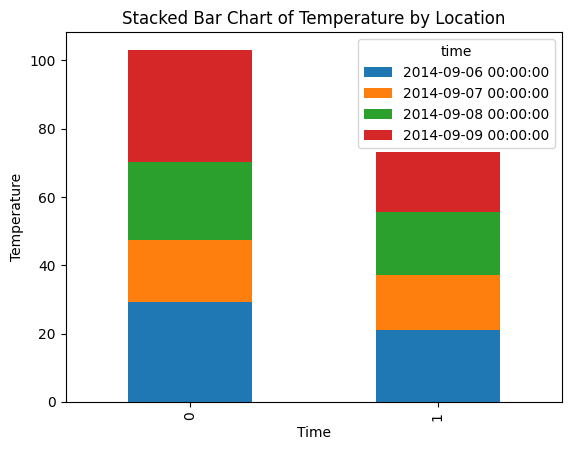

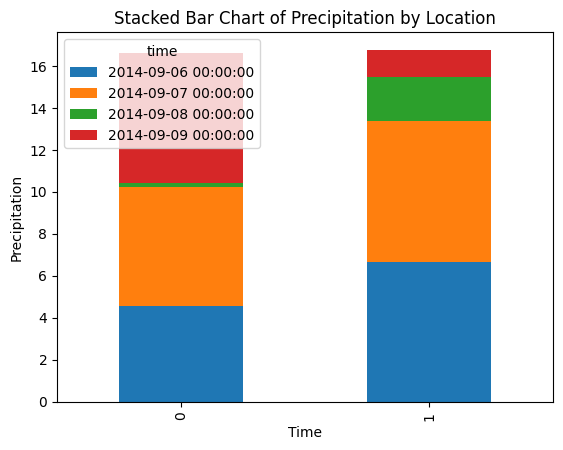

In [48]:
# Stacked Bar Chart
for var_name in ["temperature", "precipitation"]:
    # Create a new figure and axes for each variable
    fig, ax = plt.subplots()

    # Select the first instrument and then convert the DataArray to a pandas DataFrame and plot
    ds[var_name].isel(instrument=0).to_pandas().plot.bar(ax=ax, stacked=True)

    # Set titles and labels
    ax.set_title(f"Stacked Bar Chart of {var_name.capitalize()} by Location")
    ax.set_xlabel("Time")
    ax.set_ylabel(var_name.capitalize())

    # Display the plot
    plt.show()

### Grouped Bar Chart

This chart shows separate bars for temperature and precipitation for each day, with the bars for each location grouped together. This is useful for comparing the values side-by-side for each location on a specific day.

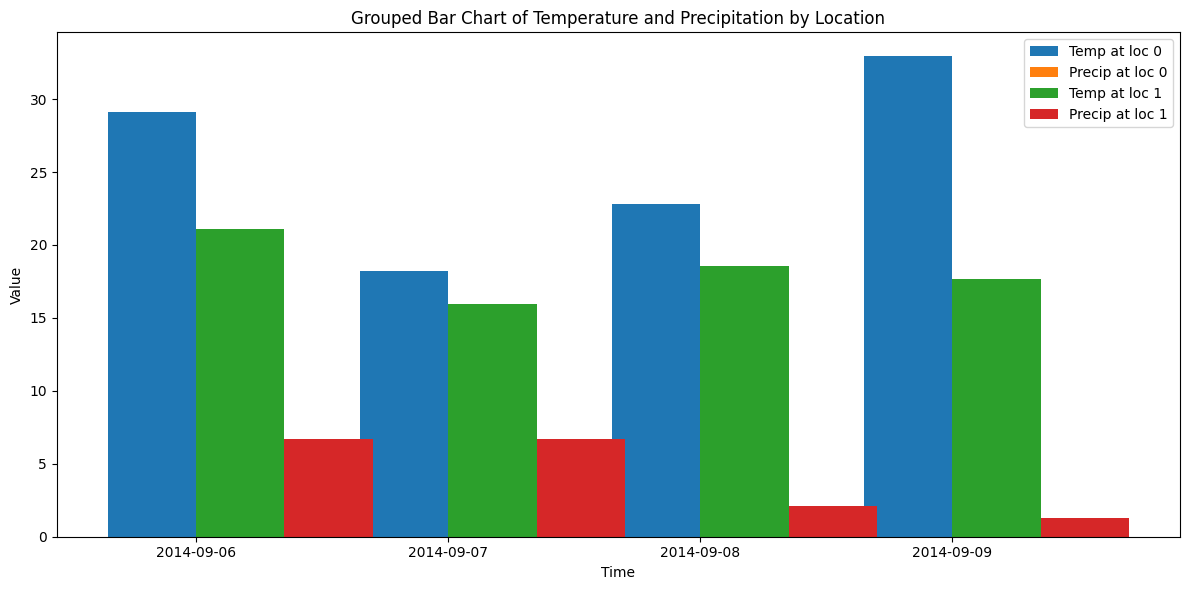

In [49]:
# Grouped Bar Chart
import numpy as np

# Get the number of locations and variables
num_locations = len(ds["loc"])
num_times = len(ds["time"])

# Set the width of each bar
bar_width = 0.35

# Create an index for the x-axis
index = np.arange(num_times)

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for each location
for i, loc_val in enumerate(ds["loc"].values):
    # Get the temperature and precipitation data for the current location and the first instrument
    temp_data = ds["temperature"].sel(loc=loc_val).isel(instrument=0).values
    precip_data = ds["precipitation"].sel(loc=loc_val).isel(instrument=0).values

    # Plot the bars for temperature and precipitation
    ax.bar(index - bar_width/2 + i*bar_width, temp_data, bar_width, label=f"Temp at loc {loc_val}")
    ax.bar(index + bar_width/2 + i*bar_width, precip_data, bar_width, label=f"Precip at loc {loc_val}")

# Set the x-axis ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(ds["time"].dt.strftime('%Y-%m-%d').values)

# Set titles and labels
ax.set_title("Grouped Bar Chart of Temperature and Precipitation by Location")
ax.set_xlabel("Time")
ax.set_ylabel("Value")

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Scatter Plot

This chart plots temperature against precipitation, with each point representing a specific time and location. This is useful for seeing if there's a relationship between the two variables.

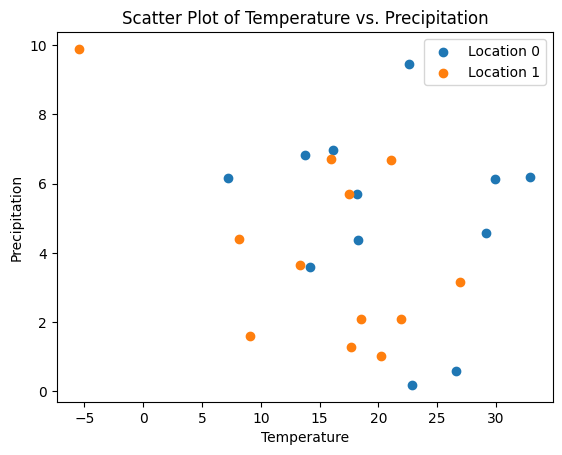

In [45]:
# Scatter Plot
# Create a new figure and axes
fig, ax = plt.subplots()

# Create a scatter plot of temperature vs. precipitation
for loc_val in ds["loc"].values:
    ax.scatter(ds["temperature"].sel(loc=loc_val), ds["precipitation"].sel(loc=loc_val), label=f"Location {loc_val}")

# Set titles and labels
ax.set_title("Scatter Plot of Temperature vs. Precipitation")
ax.set_xlabel("Temperature")
ax.set_ylabel("Precipitation")

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [50]:
xr.Dataset(dict(bar=foo))

<xarray.Dataset> Size: 152B
Dimensions:  (time: 4, space: 3)
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 96B 0.05554 0.6755 0.6174 ... 0.09942 0.9621

In [51]:
xr.Dataset(dict(bar=foo.to_pandas()))

<xarray.Dataset> Size: 152B
Dimensions:  (time: 4, space: 3)
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) object 24B 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 96B 0.05554 0.6755 0.6174 ... 0.09942 0.9621

In [52]:
print("temperature" in ds)
ds["temperature"]

True


<xarray.DataArray 'temperature' (loc: 2, instrument: 3, time: 4)> Size: 192B
array([[[29.11241877, 18.20125767, 22.82990387, 32.92714559],
        [29.94046392,  7.18177696, 22.60070734, 13.78914233],
        [14.17424919, 18.28478802, 16.15234857, 26.63418806]],

       [[21.0883018 , 15.97340013, 18.55090586, 17.66939462],
        [26.95263259, 13.35873389, 17.50454161,  8.16723409],
        [-5.42391853, 20.22894876, 21.91548959,  9.06267984]]])
Coordinates:
    lon             (loc) float64 16B -99.83 -99.32
    lat             (loc) float64 16B 42.25 42.21
  * instrument      (instrument) <U8 96B 'manufac1' 'manufac2' 'manufac3'
  * time            (time) datetime64[ns] 32B 2014-09-06 ... 2014-09-09
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: loc

In [53]:
ds.data_vars

Data variables:
    temperature    (loc, instrument, time) float64 192B 29.11 18.2 ... 9.063
    precipitation  (loc, instrument, time) float64 192B 4.562 5.684 ... 1.613

In [54]:
ds.coords

Coordinates:
    lon             (loc) float64 16B -99.83 -99.32
    lat             (loc) float64 16B 42.25 42.21
  * instrument      (instrument) <U8 96B 'manufac1' 'manufac2' 'manufac3'
  * time            (time) datetime64[ns] 32B 2014-09-06 ... 2014-09-09
    reference_time  datetime64[ns] 8B 2014-09-05

In [55]:
print(ds.attrs)
ds.attrs["title"] = "example attribute"
ds

{}


<xarray.Dataset> Size: 552B
Dimensions:         (loc: 2, instrument: 3, time: 4)
Coordinates:
    lon             (loc) float64 16B -99.83 -99.32
    lat             (loc) float64 16B 42.25 42.21
  * instrument      (instrument) <U8 96B 'manufac1' 'manufac2' 'manufac3'
  * time            (time) datetime64[ns] 32B 2014-09-06 ... 2014-09-09
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: loc
Data variables:
    temperature     (loc, instrument, time) float64 192B 29.11 18.2 ... 9.063
    precipitation   (loc, instrument, time) float64 192B 4.562 5.684 ... 1.613
Attributes:
    title:    example attribute

In [56]:
ds.temperature

<xarray.DataArray 'temperature' (loc: 2, instrument: 3, time: 4)> Size: 192B
array([[[29.11241877, 18.20125767, 22.82990387, 32.92714559],
        [29.94046392,  7.18177696, 22.60070734, 13.78914233],
        [14.17424919, 18.28478802, 16.15234857, 26.63418806]],

       [[21.0883018 , 15.97340013, 18.55090586, 17.66939462],
        [26.95263259, 13.35873389, 17.50454161,  8.16723409],
        [-5.42391853, 20.22894876, 21.91548959,  9.06267984]]])
Coordinates:
    lon             (loc) float64 16B -99.83 -99.32
    lat             (loc) float64 16B 42.25 42.21
  * instrument      (instrument) <U8 96B 'manufac1' 'manufac2' 'manufac3'
  * time            (time) datetime64[ns] 32B 2014-09-06 ... 2014-09-09
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: loc

In [57]:
ds = xr.Dataset()
ds["temperature"] = (("loc", "instrument", "time"), temperature)
ds["temperature_double"] = (("loc", "instrument", "time"), temperature * 2)
ds["precipitation"] = (("loc", "instrument", "time"), precipitation)
ds.coords["lat"] = (("loc",), lat)
ds.coords["lon"] = (("loc",), lon)
ds.coords["time"] = pd.date_range("2014-09-06", periods=4)
ds.coords["reference_time"] = pd.Timestamp("2014-09-05")

In [58]:
ds[["temperature"]]

<xarray.Dataset> Size: 264B
Dimensions:         (loc: 2, instrument: 3, time: 4)
Coordinates:
    lat             (loc) float64 16B 42.25 42.21
    lon             (loc) float64 16B -99.83 -99.32
  * time            (time) datetime64[ns] 32B 2014-09-06 ... 2014-09-09
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: loc, instrument
Data variables:
    temperature     (loc, instrument, time) float64 192B 29.11 18.2 ... 9.063

In [59]:
ds[["temperature", "temperature_double"]]

<xarray.Dataset> Size: 456B
Dimensions:             (loc: 2, instrument: 3, time: 4)
Coordinates:
    lat                 (loc) float64 16B 42.25 42.21
    lon                 (loc) float64 16B -99.83 -99.32
  * time                (time) datetime64[ns] 32B 2014-09-06 ... 2014-09-09
    reference_time      datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: loc, instrument
Data variables:
    temperature         (loc, instrument, time) float64 192B 29.11 ... 9.063
    temperature_double  (loc, instrument, time) float64 192B 58.22 ... 18.13

In [60]:
ds.drop_vars("temperature")

<xarray.Dataset> Size: 456B
Dimensions:             (loc: 2, instrument: 3, time: 4)
Coordinates:
    lat                 (loc) float64 16B 42.25 42.21
    lon                 (loc) float64 16B -99.83 -99.32
  * time                (time) datetime64[ns] 32B 2014-09-06 ... 2014-09-09
    reference_time      datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: loc, instrument
Data variables:
    temperature_double  (loc, instrument, time) float64 192B 58.22 ... 18.13
    precipitation       (loc, instrument, time) float64 192B 4.562 ... 1.613

In [61]:
ds.drop_dims("time")

<xarray.Dataset> Size: 40B
Dimensions:         (loc: 2)
Coordinates:
    lat             (loc) float64 16B 42.25 42.21
    lon             (loc) float64 16B -99.83 -99.32
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: loc
Data variables:
    *empty*

In [62]:
ds.assign(temperature2=2 * ds.temperature)

<xarray.Dataset> Size: 840B
Dimensions:             (loc: 2, instrument: 3, time: 4)
Coordinates:
    lat                 (loc) float64 16B 42.25 42.21
    lon                 (loc) float64 16B -99.83 -99.32
  * time                (time) datetime64[ns] 32B 2014-09-06 ... 2014-09-09
    reference_time      datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: loc, instrument
Data variables:
    temperature         (loc, instrument, time) float64 192B 29.11 ... 9.063
    temperature_double  (loc, instrument, time) float64 192B 58.22 ... 18.13
    precipitation       (loc, instrument, time) float64 192B 4.562 ... 1.613
    temperature2        (loc, instrument, time) float64 192B 58.22 ... 18.13

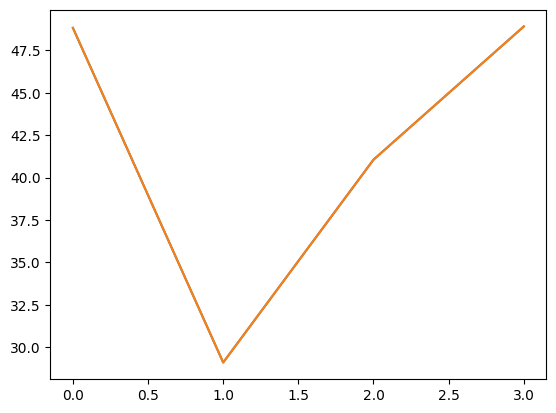

In [63]:
# these lines are equivalent, but with pipe we can make the logic flow
# entirely from left to right
plt.plot((2 * ds.temperature.sel(loc=0)).mean("instrument"))
(ds.temperature.sel(loc=0).pipe(lambda x: 2 * x).mean("instrument").pipe(plt.plot))

In [64]:
ds.rename({"temperature": "temp", "precipitation": "precip"})

<xarray.Dataset> Size: 648B
Dimensions:             (loc: 2, instrument: 3, time: 4)
Coordinates:
    lat                 (loc) float64 16B 42.25 42.21
    lon                 (loc) float64 16B -99.83 -99.32
  * time                (time) datetime64[ns] 32B 2014-09-06 ... 2014-09-09
    reference_time      datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: loc, instrument
Data variables:
    temp                (loc, instrument, time) float64 192B 29.11 ... 9.063
    temperature_double  (loc, instrument, time) float64 192B 58.22 ... 18.13
    precip              (loc, instrument, time) float64 192B 4.562 ... 1.613

In [65]:
ds.coords["day"] = ("time", [6, 7, 8, 9])
ds.swap_dims({"time": "day"})

<xarray.Dataset> Size: 680B
Dimensions:             (loc: 2, instrument: 3, day: 4)
Coordinates:
    lat                 (loc) float64 16B 42.25 42.21
    lon                 (loc) float64 16B -99.83 -99.32
    time                (day) datetime64[ns] 32B 2014-09-06 ... 2014-09-09
    reference_time      datetime64[ns] 8B 2014-09-05
  * day                 (day) int64 32B 6 7 8 9
Dimensions without coordinates: loc, instrument
Data variables:
    temperature         (loc, instrument, day) float64 192B 29.11 18.2 ... 9.063
    temperature_double  (loc, instrument, day) float64 192B 58.22 36.4 ... 18.13
    precipitation       (loc, instrument, day) float64 192B 4.562 ... 1.613

In [66]:
ds1 = xr.Dataset({"foo": "orange"})
dt = xr.DataTree(name="root", dataset=ds1)
dt

<xarray.DataTree 'root'>
Group: /
    Dimensions:  ()
    Data variables:
        foo      <U6 24B 'orange'

In [67]:
import xarray as xr
import numpy as np

# Imagine you have a model that takes two parameters: 'alpha' and 'beta'
parameters = {"alpha": [0.1, 0.5, 1.0], "beta": [10, 20]}

# Create a root DataTree
dt = xr.DataTree(name="model_results")

# Loop through the parameter combinations and create a node for each
for alpha_val in parameters["alpha"]:
    for beta_val in parameters["beta"]:
        # Create a child node for this parameter combination
        child_node = xr.DataTree(name=f"alpha_{alpha_val}_beta_{beta_val}")

        # Simulate some model output
        model_output = np.random.rand(10) * alpha_val + beta_val
        ds = xr.Dataset({"output": (("time",), model_output)},
                        coords={"time": np.arange(10)})

        # Add the dataset to the child node
        child_node["run_data"] = ds

        # Add the child node to the root DataTree
        dt[f"alpha_{alpha_val}/beta_{beta_val}"] = child_node

# Now you can easily access the results for a specific parameter combination
display(dt['alpha_0.5/beta_10'])

<xarray.DataTree 'beta_10'>
Group: /alpha_0.5/beta_10
└── Group: /alpha_0.5/beta_10/run_data
        Dimensions:  (time: 10)
        Coordinates:
          * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9
        Data variables:
            output   (time) float64 80B 10.14 10.06 10.15 10.06 ... 10.35 10.28 10.13

In [68]:
print(dt.parent is None)
dt.children

True


Frozen({'alpha_0.1': <xarray.DataTree 'alpha_0.1'>
Group: /alpha_0.1
├── Group: /alpha_0.1/beta_10
│   └── Group: /alpha_0.1/beta_10/run_data
│           Dimensions:  (time: 10)
│           Coordinates:
│             * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9
│           Data variables:
│               output   (time) float64 80B 10.07 10.03 10.05 10.02 ... 10.01 10.02 10.04
└── Group: /alpha_0.1/beta_20
    └── Group: /alpha_0.1/beta_20/run_data
            Dimensions:  (time: 10)
            Coordinates:
              * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9
            Data variables:
                output   (time) float64 80B 20.08 20.01 20.08 20.01 ... 20.06 20.07 20.0, 'alpha_0.5': <xarray.DataTree 'alpha_0.5'>
Group: /alpha_0.5
├── Group: /alpha_0.5/beta_10
│   └── Group: /alpha_0.5/beta_10/run_data
│           Dimensions:  (time: 10)
│           Coordinates:
│             * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9
│           Data variables:
│               ou

In [69]:
# create a third Dataset
ds3 = xr.Dataset({"zed": np.nan})
# create a tree from a dictionary of DataTrees and Datasets
dt = xr.DataTree.from_dict({"/": dt, "/child-node/new-zed-node": ds3})

In [70]:
dt

<xarray.DataTree>
Group: /
├── Group: /alpha_0.1
│   ├── Group: /alpha_0.1/beta_10
│   │   └── Group: /alpha_0.1/beta_10/run_data
│   │           Dimensions:  (time: 10)
│   │           Coordinates:
│   │             * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9
│   │           Data variables:
│   │               output   (time) float64 80B 10.07 10.03 10.05 10.02 ... 10.01 10.02 10.04
│   └── Group: /alpha_0.1/beta_20
│       └── Group: /alpha_0.1/beta_20/run_data
│               Dimensions:  (time: 10)
│               Coordinates:
│                 * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9
│               Data variables:
│                   output   (time) float64 80B 20.08 20.01 20.08 20.01 ... 20.06 20.07 20.0
├── Group: /alpha_0.5
│   ├── Group: /alpha_0.5/beta_10
│   │   └── Group: /alpha_0.5/beta_10/run_data
│   │           Dimensions:  (time: 10)
│   │           Coordinates:
│   │             * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9
│   │           Data variables:
│   │               output   (time) float64 80B 10.14 10.06 10.15 10.06 ... 10.35 10.28 10.13
│   └── Group: /alpha_0.5/beta_20
│       └── Group: /alpha_0.5/beta_20/run_data
│               Dimensions:  (time: 10)
│               Coordinates:
│                 * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9
│               Data variables:
│                   output   (time) float64 80B 20.26 20.05 20.29 20.46 ... 20.36 20.14 20.09
├── Group: /alpha_1.0
│   ├── Group: /alpha_1.0/beta_10
│   │   └── Group: /alpha_1.0/beta_10/run_data
│   │           Dimensions:  (time: 10)
│   │           Coordinates:
│   │             * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9
│   │           Data variables:
│   │               output   (time) float64 80B 10.59 10.02 10.83 10.0 ... 10.96 10.25 10.58
│   └── Group: /alpha_1.0/beta_20
│       └── Group: /alpha_1.0/beta_20/run_data
│               Dimensions:  (time: 10)
│               Coordinates:
│                 * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9
│               Data variables:
│                   output   (time) float64 80B 20.59 20.57 20.22 20.95 ... 20.7 20.3 20.81 20.4
└── Group: /child-node
    └── Group: /child-node/new-zed-node
            Dimensions:  ()
            Data variables:
                zed      float64 8B nan

In [74]:
dt["child-node"]

<xarray.DataTree 'child-node'>
Group: /child-node
└── Group: /child-node/new-zed-node
        Dimensions:  ()
        Data variables:
            zed      float64 8B nan

In [75]:
dt["child-node"].dataset

<xarray.DatasetView> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

In [76]:
dt["child-node"].to_dataset()

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

In [77]:
dt["child-node"].data_vars

Data variables:
    *empty*

In [78]:
dt = xr.DataTree(name="root")
dt["foo"] = "orange"
dt["child-node"] = xr.DataTree(
    dataset=xr.Dataset({"bar": 0}, coords={"y": ("y", [0, 1, 2])})
)
dt["child-node/new-zed-node/zed"] = np.nan
dt

<xarray.DataTree 'root'>
Group: /
│   Dimensions:  ()
│   Data variables:
│       foo      <U6 24B 'orange'
└── Group: /child-node
    │   Dimensions:  (y: 3)
    │   Coordinates:
    │     * y        (y) int64 24B 0 1 2
    │   Data variables:
    │       bar      int64 8B 0
    └── Group: /child-node/new-zed-node
            Dimensions:  ()
            Data variables:
                zed      float64 8B nan

In [79]:
# Set up coordinates
time = xr.DataArray(data=["2022-01", "2023-01"], dims="time")
stations = xr.DataArray(data=list("abcdef"), dims="station")
lon = [-100, -80, -60]
lat = [10, 20, 30]

# Set up fake data
wind_speed = xr.DataArray(np.ones((2, 6)) * 2, dims=("time", "station"))
pressure = xr.DataArray(np.ones((2, 6)) * 3, dims=("time", "station"))
air_temperature = xr.DataArray(np.ones((2, 6)) * 4, dims=("time", "station"))
dewpoint = xr.DataArray(np.ones((2, 6)) * 5, dims=("time", "station"))
infrared = xr.DataArray(np.ones((2, 3, 3)) * 6, dims=("time", "lon", "lat"))
true_color = xr.DataArray(np.ones((2, 3, 3)) * 7, dims=("time", "lon", "lat"))

dt2 = xr.DataTree.from_dict(
    {
        "/": xr.Dataset(
            coords={"time": time},
        ),
        "/weather": xr.Dataset(
            coords={"station": stations},
            data_vars={
                "wind_speed": wind_speed,
                "pressure": pressure,
            },
        ),
        "/weather/temperature": xr.Dataset(
            data_vars={
                "air_temperature": air_temperature,
                "dewpoint": dewpoint,
            },
        ),
        "/satellite": xr.Dataset(
            coords={"lat": lat, "lon": lon},
            data_vars={
                "infrared": infrared,
                "true_color": true_color,
            },
        ),
    },
)
dt2

<xarray.DataTree>
Group: /
│   Dimensions:  (time: 2)
│   Coordinates:
│     * time     (time) <U7 56B '2022-01' '2023-01'
├── Group: /weather
│   │   Dimensions:     (station: 6, time: 2)
│   │   Coordinates:
│   │     * station     (station) <U1 24B 'a' 'b' 'c' 'd' 'e' 'f'
│   │   Data variables:
│   │       wind_speed  (time, station) float64 96B 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
│   │       pressure    (time, station) float64 96B 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
│   └── Group: /weather/temperature
│           Dimensions:          (time: 2, station: 6)
│           Data variables:
│               air_temperature  (time, station) float64 96B 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0
│               dewpoint         (time, station) float64 96B 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0
└── Group: /satellite
        Dimensions:     (lat: 3, lon: 3, time: 2)
        Coordinates:
          * lat         (lat) int64 24B 10 20 30
          * lon         (lon) int64 24B -100 -80 -60
        Data variables:
            infrared    (time, lon, lat) float64 144B 6.0 6.0 6.0 6.0 ... 6.0 6.0 6.0
            true_color  (time, lon, lat) float64 144B 7.0 7.0 7.0 7.0 ... 7.0 7.0 7.0

In [80]:
dt2["/weather"]

<xarray.DataTree 'weather'>
Group: /weather
│   Dimensions:     (time: 2, station: 6)
│   Coordinates:
│     * station     (station) <U1 24B 'a' 'b' 'c' 'd' 'e' 'f'
│   Inherited coordinates:
│     * time        (time) <U7 56B '2022-01' '2023-01'
│   Data variables:
│       wind_speed  (time, station) float64 96B 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
│       pressure    (time, station) float64 96B 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
└── Group: /weather/temperature
        Dimensions:          (time: 2, station: 6)
        Data variables:
            air_temperature  (time, station) float64 96B 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0
            dewpoint         (time, station) float64 96B 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0

In [81]:
dt2["/weather/temperature"].dataset

<xarray.DatasetView> Size: 272B
Dimensions:          (time: 2, station: 6)
Coordinates:
  * time             (time) <U7 56B '2022-01' '2023-01'
  * station          (station) <U1 24B 'a' 'b' 'c' 'd' 'e' 'f'
Data variables:
    air_temperature  (time, station) float64 96B 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0
    dewpoint         (time, station) float64 96B 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0

In [82]:
dt2["/weather/temperature"].to_dataset()

<xarray.Dataset> Size: 272B
Dimensions:          (time: 2, station: 6)
Coordinates:
  * time             (time) <U7 56B '2022-01' '2023-01'
  * station          (station) <U1 24B 'a' 'b' 'c' 'd' 'e' 'f'
Data variables:
    air_temperature  (time, station) float64 96B 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0
    dewpoint         (time, station) float64 96B 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0

In [83]:
ds.coords

Coordinates:
  * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9

In [84]:
ds.reset_coords()

<xarray.Dataset> Size: 160B
Dimensions:  (time: 10)
Coordinates:
  * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9
Data variables:
    output   (time) float64 80B 20.59 20.57 20.22 20.95 ... 20.7 20.3 20.81 20.4